# Models Train & Test
In this notebook **Random Forest** and the **XGBoost** Classifiers are:
- Configured with the tuned hyperparameters
- Trained with the training dataset
- Tested with actual data

The metrics **ROC Curve**, **Confusion Matrix** and **Feature Importance** are calculated and visualized for the evaluation of the final results on actual data

In [1]:
import import_ipynb
from ipynb.fs.full.WFML_Utilities import wfml

## Train Models and Print Results (on training dataset)

In [2]:
XGBoost = wfml.train(
    classifier = 'XGB',
    parameters = { #Latest Optimization
        'subsample': 1,
        'scale_pos_weight': 80,
        'n_estimators': 200,
        'max_depth': 28,
        'lambda': 25,
        'gamma': 1,
        'alpha': 10
})

RandomForest = wfml.train(
    classifier = 'RF',
    parameters = { #Latest Optimization
        'n_estimators': 100,
        'min_samples_split': 2,
        'min_samples_leaf': 10,
        'max_features': 5,
        'max_depth': None,
        'criterion': 'entropy',
        'class_weight': {0: 1, 1: 100},
        'bootstrap': False
})

Training Results for XGBClassifier.
Time Elapsed: 2.87 seconds.
              precision    recall  f1-score   support

     no-fire       0.98      0.68      0.80      2529
        fire       0.77      0.99      0.87      2792

    accuracy                           0.84      5321
   macro avg       0.88      0.83      0.84      5321
weighted avg       0.87      0.84      0.84      5321



Training Results for RandomForestClassifier.
Time Elapsed: 23.11 seconds.
              precision    recall  f1-score   support

     no-fire       0.98      0.61      0.76      2529
        fire       0.74      0.99      0.85      2792

    accuracy                           0.81      5321
   macro avg       0.86      0.80      0.80      5321
weighted avg       0.86      0.81      0.80      5321





## Test Models with Actual Data and Print Results
(Progress displayed in console)

In [3]:
#XGBoost
report_XGB = wfml.test(model = XGBoost, storage = 'test')

#Random Forest
report_RF = wfml.test(model = RandomForest, storage = 'test')

Test Results for XGBClassifier.
Time Elapsed: 182.95 seconds.
              precision    recall  f1-score   support

     no-fire       1.00      0.67      0.80  15485875
        fire       0.00      0.85      0.00       284

    accuracy                           0.67  15486159
   macro avg       0.50      0.76      0.40  15486159
weighted avg       1.00      0.67      0.80  15486159



Test Results for RandomForestClassifier.
Time Elapsed: 435.46 seconds.
              precision    recall  f1-score   support

     no-fire       1.00      0.66      0.80  15485875
        fire       0.00      0.96      0.00       284

    accuracy                           0.66  15486159
   macro avg       0.50      0.81      0.40  15486159
weighted avg       1.00      0.66      0.80  15486159





## ROC Curve
ROC curve evaluates our models' performance in distinguishing 'fire' from 'no-fire' by plotting sensitivity against 1-specificity.

XGBClassifier


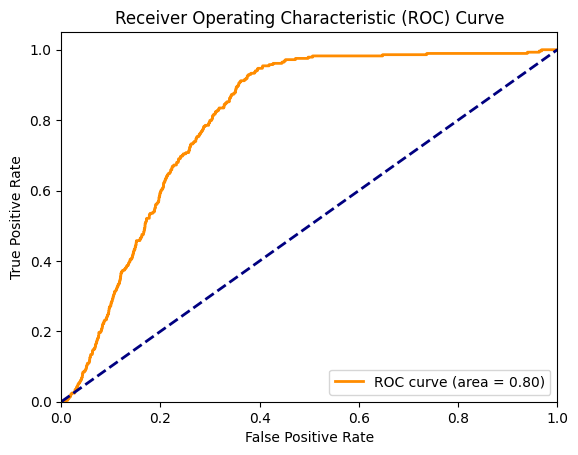

RandomForestClassifier


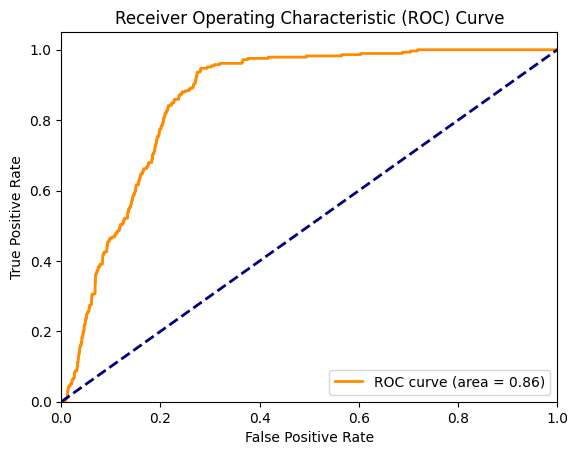

In [4]:
#XGBoost
wfml.roc_curve(model = XGBoost, labels = report_XGB['labels'], scores = report_XGB['scores'])

#Random Forest
wfml.roc_curve(model = RandomForest, labels = report_RF['labels'], scores = report_RF['scores'])

## Confusion Matrix
The confusion matrix shows us the number of misclassified values, namely true positives, true negatives, false positives, and false negatives.

XGBClassifier


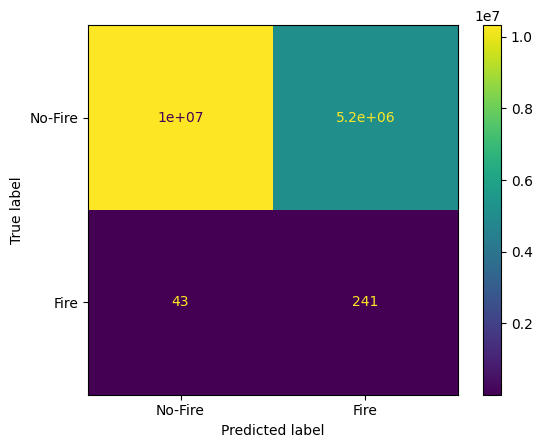

RandomForestClassifier


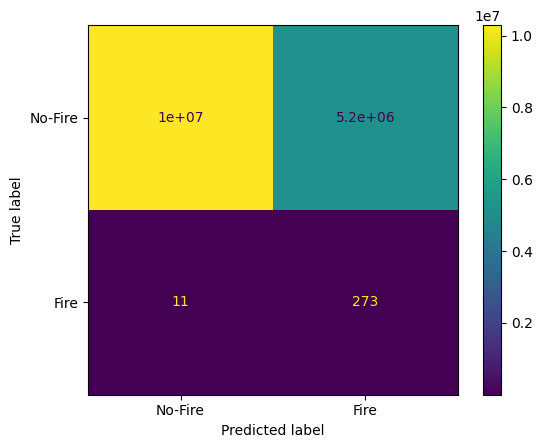

In [5]:
#XGBoost
wfml.confusion_matrix(model = XGBoost, labels = report_XGB['labels'], predictions = report_XGB['predictions'])

#Random Forest
wfml.confusion_matrix(model = RandomForest, labels = report_RF['labels'], predictions = report_RF['predictions'])

## Feature Importance
Feature importance is used to identify the most influential variables in our models by ranking their impact on predictions

XGBClassifier


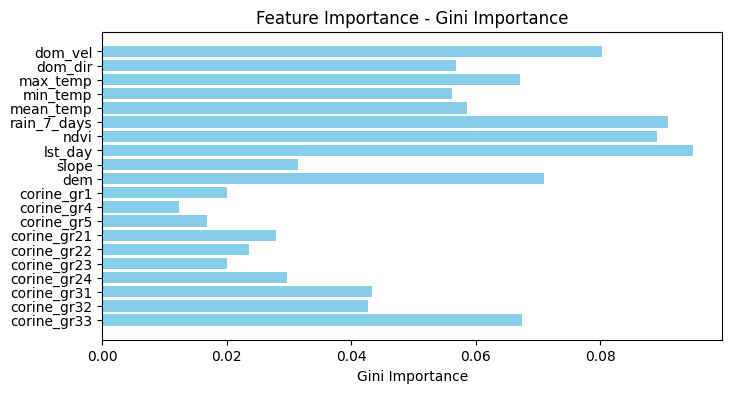

RandomForestClassifier


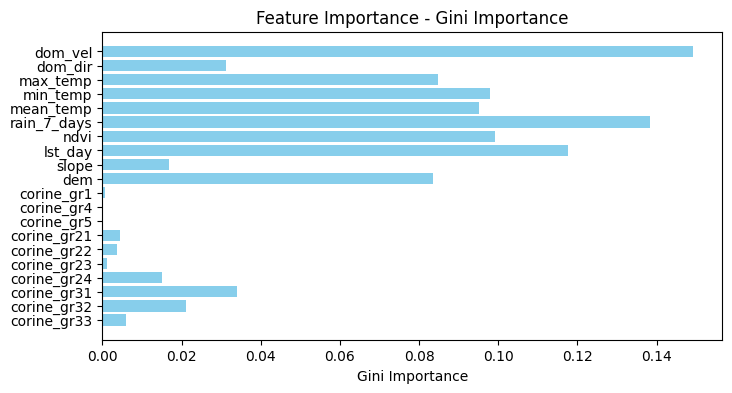

In [6]:
#XGBoost
wfml.feature_importance(model = XGBoost)

#Random Forest
wfml.feature_importance(model = RandomForest)